# Binning with autocorrelation

In [1]:
import pandas as pd
from nptdms import TdmsFile
import matplotlib.pyplot as plt
import numpy as np

# Functions definition

def rename(df):
    df = df.rename(columns={
        "/'Untitled'/'Micr1'": 'Micr1',
        "/'Untitled'/'Acc1X'": 'Acc1X',
        "/'Untitled'/'Acc1Y'": 'Acc1Y',
        "/'Untitled'/'Acc1Z'": 'Acc1Z',
        "/'Untitled'/'Acc5X'": 'Acc5X',
        "/'Untitled'/'Acc5Y'": 'Acc5Y',
        "/'Untitled'/'Acc5Z'": 'Acc5Z',
        "/'Untitled'/'Acc1L'": 'Acc1L',
        "/'Untitled'/'Acc3X'": 'Acc3X',
        "/'Untitled'/'Acc3Y'": 'Acc3Y',
        "/'Untitled'/'Acc3Z'": 'Acc3Z',
        "/'Untitled'/'Acc3L'": 'Acc3L',
        "/'Untitled'/'Acc5L'": 'Acc5L',
        "/'Untitled'/'Acc2L'": 'Acc2L',
        "/'Untitled'/'Acc4L'": 'Acc4L',
        "/'Untitled'/'Mems3'": 'Mems3',
        "/'Untitled'/'Curr1'": 'Curr1',
        "/'Untitled'/'Curr2'": 'Curr2',
        "/'Untitled'/'Curr3'": 'Curr3',
        "/'Untitled'/'Mems5X'": 'Mems5X',
        "/'Untitled'/'Mems5Y'": 'Mems5Y',
        "/'Untitled'/'Mems5Z'": 'Mems5Z',
        "/'Untitled'/'SlowShaftTrigger'": 'SlowShaftTrigger'
    })
    return df

def createPandasDF(df):
    df = df.dropna()
    df = rename(df)
    return df

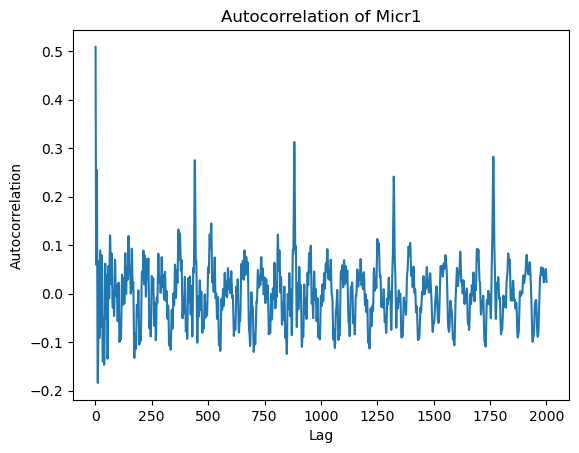

The maximum peak between 200 and 600 occurs at lag 440 with value 0.24406696029174715
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.27894003534970213
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.22264505448718003
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.2533792149668315


In [9]:
def plot_autocorrelation(file_path, column_name, max_lag):
    try:
        # Load the TDMS file
        tdms_file = TdmsFile.read(file_path)

        # Convert the TDMS file to a DataFrame
        df = tdms_file.as_dataframe()

        # Clean and rename the columns
        df = createPandasDF(df)

        df.head()

        # Extract the specified column
        series = df[column_name]

        # Calculate and plot the autocorrelation for the specified column
        autocorr_values = [series.autocorr(lag=i) for i in range(1, max_lag + 1)]  # Exclude lag 0
        plt.plot(range(1, max_lag + 1), autocorr_values)
        plt.title(f'Autocorrelation of {column_name}')
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.show()

        # Find the lag corresponding to the maximum peak starting from lag 200
        lag_max_peak = np.argmax(autocorr_values[200:600]) + 200
        max_peak_value = autocorr_values[lag_max_peak - 1]
        print(f"The maximum peak between 200 and 600 occurs at lag {lag_max_peak} with value {max_peak_value}")

        lag_max_peak = np.argmax(autocorr_values[600:1200]) + 600
        max_peak_value = autocorr_values[lag_max_peak - 1]
        print(f"The maximum peak between 600 and 1200 occurs at lag {lag_max_peak} with value {max_peak_value}")

        lag_max_peak = np.argmax(autocorr_values[1200:1500]) + 1200
        max_peak_value = autocorr_values[lag_max_peak - 1]
        print(f"The maximum peak between 1200 and 1500 occurs at lag {lag_max_peak} with value {max_peak_value}")

        lag_max_peak = np.argmax(autocorr_values[1500:1900]) + 1500
        max_peak_value = autocorr_values[lag_max_peak - 1]
        print(f"The maximum peak between 1500 and 1900 occurs at lag {lag_max_peak} with value {max_peak_value}")

    except Exception as e:
        print(f"An error occurred: {e}")
        
        
file_path = '/Belt_Tests/Data/Nominal/data_Test40_0033_Nominal_sampled.tdms'
plot_autocorrelation(file_path, column_name='Micr1', max_lag=2000) 



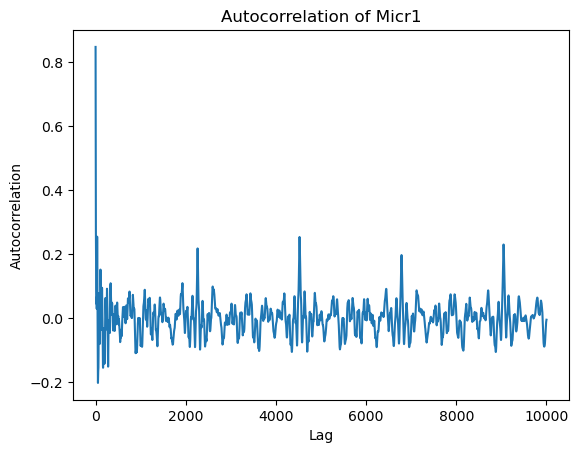

The maximum peak between 2000 and 3900 occurs at lag 2262 with value 0.21801107644894754


In [11]:
def plot_autocorrelation(file_path, column_name, max_lag):
    try:
        # Load the TDMS file
        tdms_file = TdmsFile.read(file_path)

        # Convert the TDMS file to a DataFrame
        df = tdms_file.as_dataframe()

        # Clean and rename the columns
        df = createPandasDF(df)

        df.head()

        # Extract the specified column
        series = df[column_name]

        # Calculate and plot the autocorrelation for the specified column
        autocorr_values = [series.autocorr(lag=i) for i in range(1, max_lag + 1)]  # Exclude lag 0
        plt.plot(range(1, max_lag + 1), autocorr_values)
        plt.title(f'Autocorrelation of {column_name}')
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.show()

        # Find the lag corresponding to the maximum peak starting from lag 2000

        lag_max_peak = np.argmax(autocorr_values[2000:3900]) + 2000
        max_peak_value = autocorr_values[lag_max_peak - 1]
        print(f"The maximum peak between 2000 and 3900 occurs at lag {lag_max_peak} with value {max_peak_value}")

    except Exception as e:
        print(f"An error occurred: {e}")
        
file_path = '/Belt_Tests/Data/NonCamp/data_Test12_0008_Nominal.tdms'
plot_autocorrelation(file_path, column_name='Micr1', max_lag=10000) 


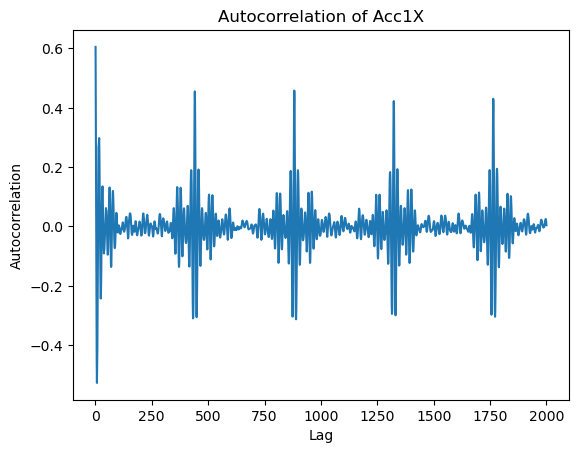

The maximum peak between 200 and 600 occurs at lag 440 with value 0.4035168953150327
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.4055791765715413
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.38490019353293753
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.37089486388989745


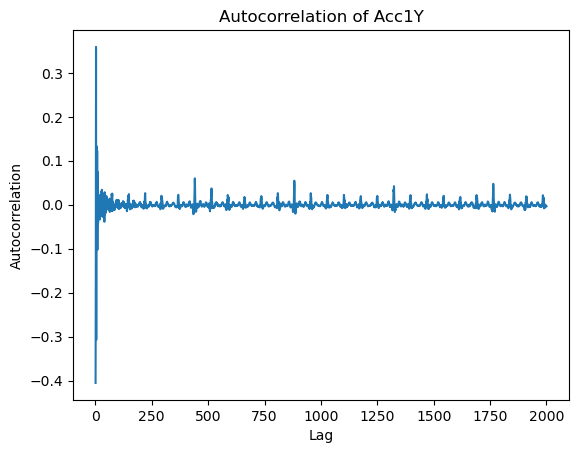

The maximum peak between 200 and 600 occurs at lag 440 with value 0.02959261533687604
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.03232719233149055
The maximum peak between 1200 and 1500 occurs at lag 1323 with value 0.02957777143715196
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.022522848592843283


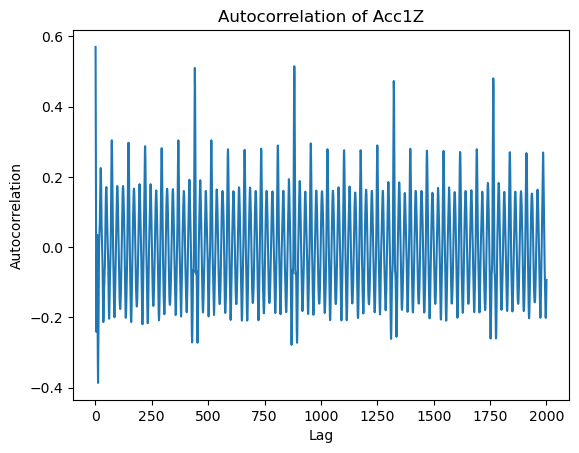

The maximum peak between 200 and 600 occurs at lag 440 with value 0.44662341173216313
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.444087677315765
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.41016265395494766
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.4034080833354849


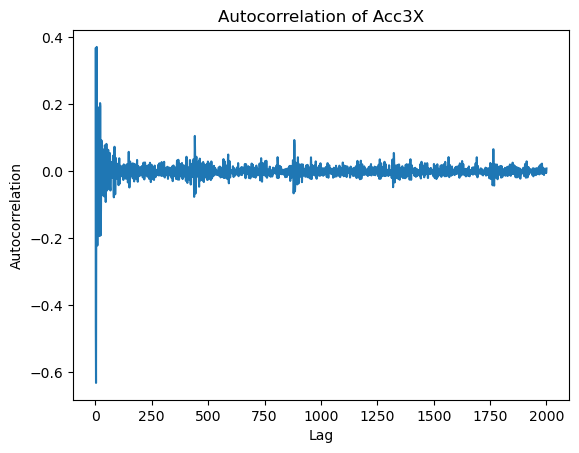

The maximum peak between 200 and 600 occurs at lag 440 with value 0.04357586655309921
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.032935793340539414
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.02632121491313587
The maximum peak between 1500 and 1900 occurs at lag 1764 with value 0.06621070469955913


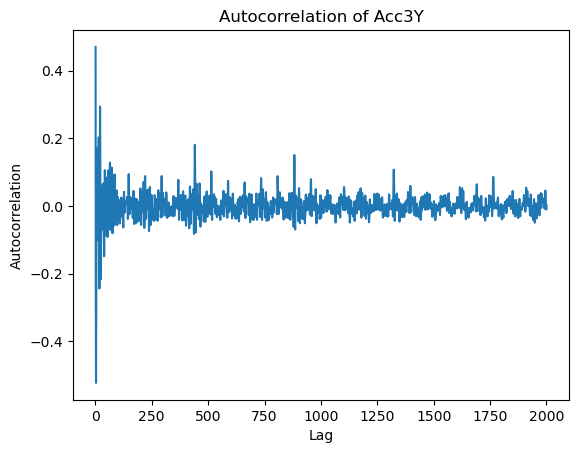

The maximum peak between 200 and 600 occurs at lag 440 with value 0.11099263286089214
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.09133405624813101
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.08996781928307493
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.07002764444799527


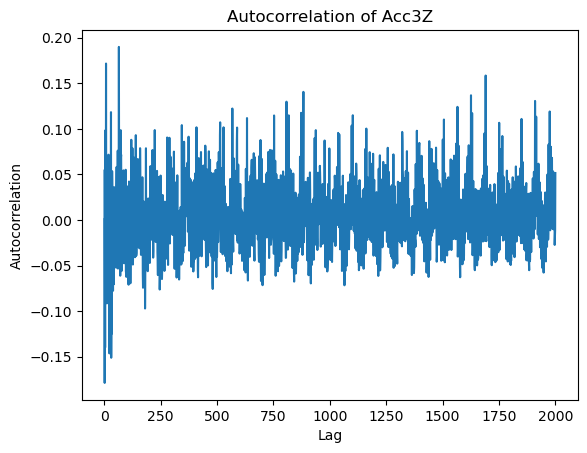

The maximum peak between 200 and 600 occurs at lag 567 with value 0.005518414699671965
The maximum peak between 600 and 1200 occurs at lag 882 with value 0.10354054698551231
The maximum peak between 1200 and 1500 occurs at lag 1385 with value -0.015176186770260058
The maximum peak between 1500 and 1900 occurs at lag 1690 with value 0.031760509598134805


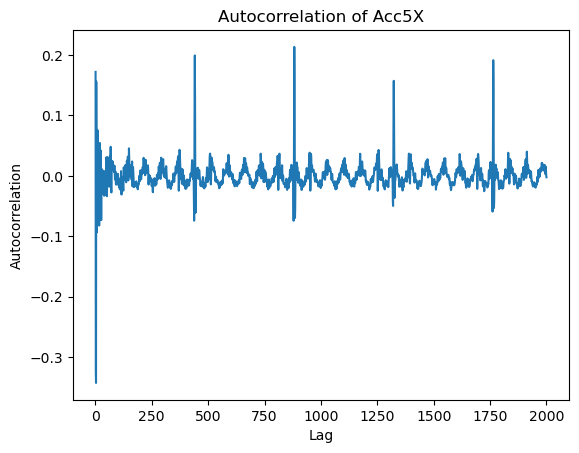

The maximum peak between 200 and 600 occurs at lag 440 with value 0.1313055511283783
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.11975099965901431
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.11160431436492561
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.10519382436640688


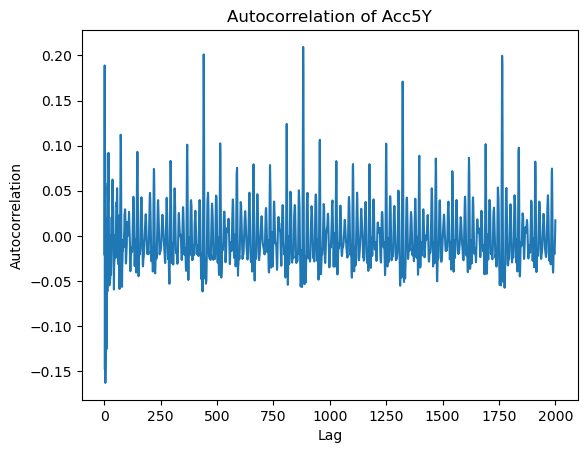

The maximum peak between 200 and 600 occurs at lag 440 with value 0.14527395871371693
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.15099400661709073
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.14060922907697418
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.14643215694032355


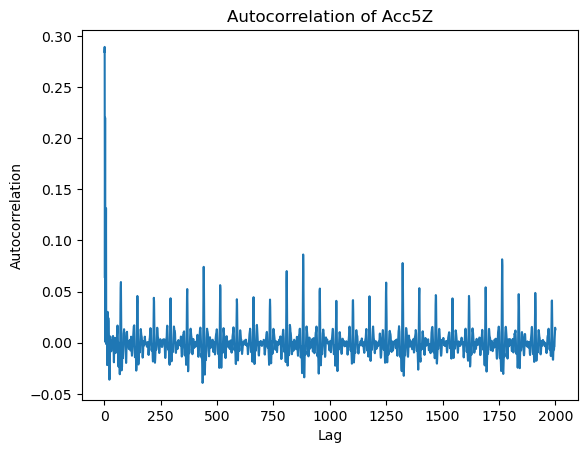

The maximum peak between 200 and 600 occurs at lag 440 with value 0.0544550868105796
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.06254703760520931
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.0634051538506781
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.06603400159566272


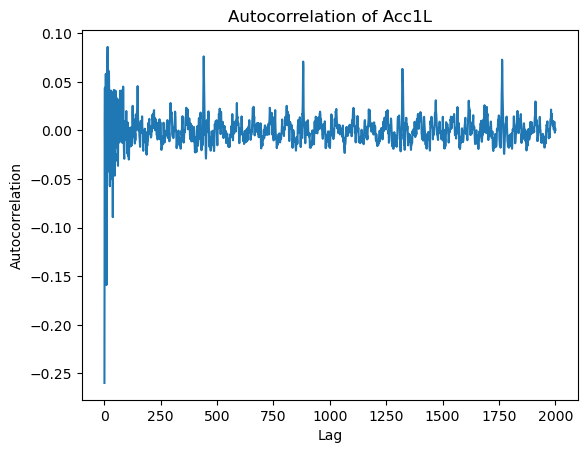

The maximum peak between 200 and 600 occurs at lag 440 with value 0.053387894987663366
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.0536664118958552
The maximum peak between 1200 and 1500 occurs at lag 1321 with value 0.04909193690107506
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.04775317394956778


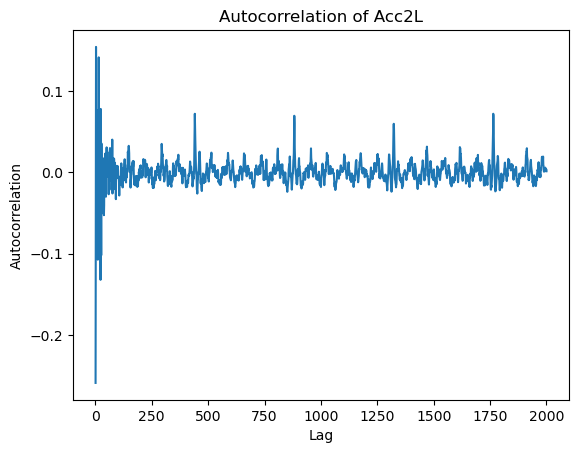

The maximum peak between 200 and 600 occurs at lag 440 with value 0.050057308442102016
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.05183992171542586
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.05521935985848413
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.04797413052601351


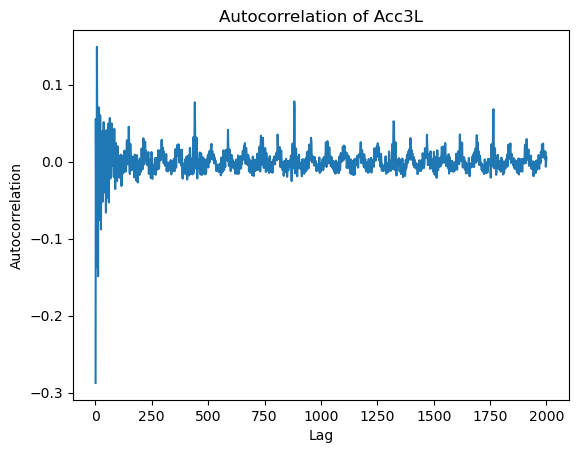

The maximum peak between 200 and 600 occurs at lag 440 with value 0.04641635282639885
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.04902260106410511
The maximum peak between 1200 and 1500 occurs at lag 1321 with value 0.036721211018328266
The maximum peak between 1500 and 1900 occurs at lag 1764 with value 0.06557685885631112


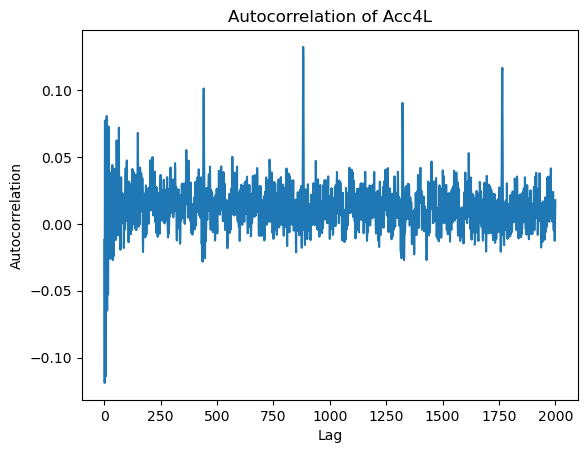

The maximum peak between 200 and 600 occurs at lag 440 with value 0.08153635193005095
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.0837997704466145
The maximum peak between 1200 and 1500 occurs at lag 1321 with value 0.05956698989379977
The maximum peak between 1500 and 1900 occurs at lag 1764 with value 0.11345109555536409


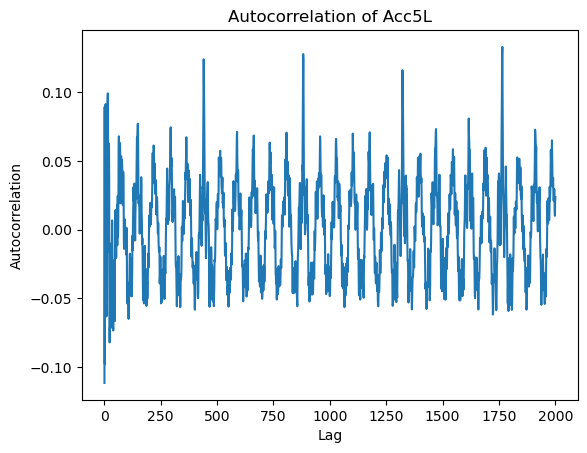

The maximum peak between 200 and 600 occurs at lag 440 with value 0.10226352164429482
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.10304232316020306
The maximum peak between 1200 and 1500 occurs at lag 1321 with value 0.096904326214394
The maximum peak between 1500 and 1900 occurs at lag 1764 with value 0.12714031733612932


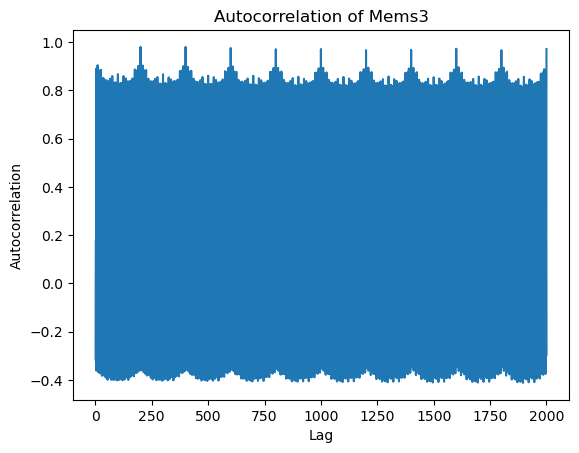

The maximum peak between 200 and 600 occurs at lag 399 with value -0.3131410363977575
The maximum peak between 600 and 1200 occurs at lag 999 with value -0.31038171511434787
The maximum peak between 1200 and 1500 occurs at lag 1399 with value -0.3050855192559998
The maximum peak between 1500 and 1900 occurs at lag 1599 with value -0.30370077643813126


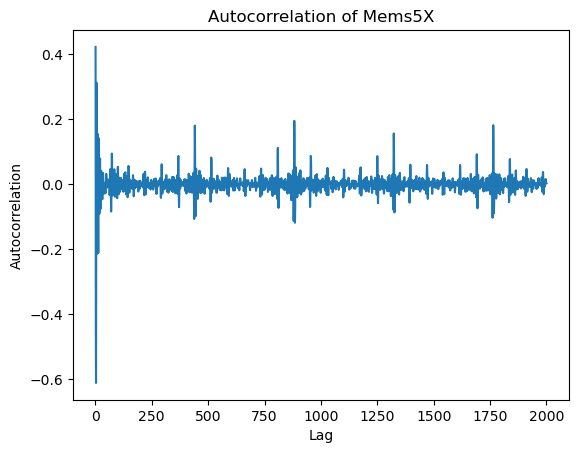

The maximum peak between 200 and 600 occurs at lag 440 with value 0.09737812580518232
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.09088776422262053
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.0869725118112224
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.08566988269403443


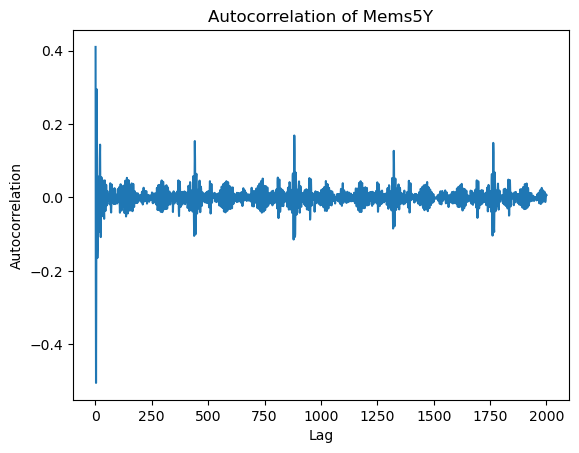

The maximum peak between 200 and 600 occurs at lag 440 with value 0.08619288216030623
The maximum peak between 600 and 1200 occurs at lag 881 with value 0.0866099054421803
The maximum peak between 1200 and 1500 occurs at lag 1322 with value 0.06975353207666413
The maximum peak between 1500 and 1900 occurs at lag 1763 with value 0.06709388178853784


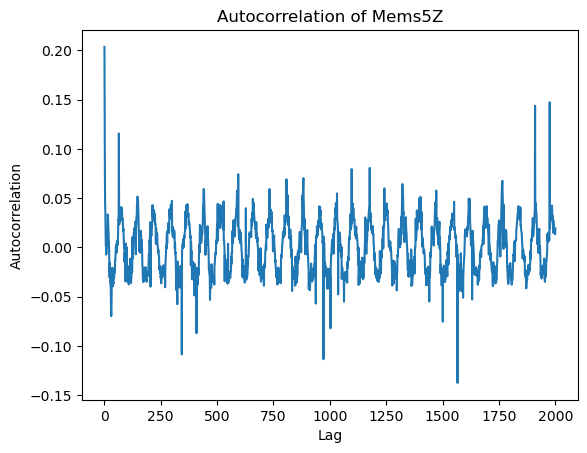

The maximum peak between 200 and 600 occurs at lag 593 with value 0.021692562565990274
The maximum peak between 600 and 1200 occurs at lag 1176 with value 0.039835769450924624
The maximum peak between 1200 and 1500 occurs at lag 1321 with value 0.06148594118798925
The maximum peak between 1500 and 1900 occurs at lag 1764 with value 0.06450450723798976


In [10]:
plot_autocorrelation(file_path, column_name='Acc1X', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc1Y', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc1Z', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc3X', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc3Y', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc3Z', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc5X', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc5Y', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc5Z', max_lag=2000) 
plot_autocorrelation(file_path, column_name='Acc1L', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc2L', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc3L', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc4L', max_lag=2000)
plot_autocorrelation(file_path, column_name='Acc5L', max_lag=2000)
plot_autocorrelation(file_path, column_name='Mems3', max_lag=2000)
plot_autocorrelation(file_path, column_name='Mems5X', max_lag=2000)
plot_autocorrelation(file_path, column_name='Mems5Y', max_lag=2000)
plot_autocorrelation(file_path, column_name='Mems5Z', max_lag=2000)

In [15]:
# Define the original DataFrame and the desired bin size
bin_size = 440

# List of columns to be binned
columns_to_bin = df.columns

# Initialize an empty dictionary to store the results of binning for each column
binned_data = {}

# Iterate over all columns to be binned
for column in columns_to_bin:
    # Perform binning by grouping by bin_size and applying the desired aggregation functions
    binned_col = df[column].groupby(df.index // bin_size).agg(['mean', 'skew', 'var'])

    # Rename the resulting columns based on the metric used
    binned_col.columns = [f'{column}_{metric}_binned' for metric in ['mean', 'skew', 'var']]

    # Add the results to the dictionary
    binned_data[column] = binned_col

# Create a complete DataFrame with all binned columns
binned_df = pd.concat(binned_data.values(), axis=1)

binned_df.head(30)


,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,SlowShaftTrigger_mean_binned,SlowShaftTrigger_skew_binned,SlowShaftTrigger_var_binned
0,0.022305,0.112169,4.818411,0.060053,0.092689,0.672180,-0.029594,0.485999,6.883387,0.021697,...,0.002569,1.653935,0.059333,0.000931,1.688826,0.510227,0.000533,0.0,0.0,0.0
1,0.166558,-0.100571,4.158950,0.048607,0.662396,0.726209,0.005741,-1.143190,8.277805,0.010843,...,0.002140,1.653979,0.362036,0.000967,1.689575,0.845845,0.000542,0.0,0.0,0.0
2,0.117151,0.145548,4.170672,0.055599,-0.180484,0.810797,-0.060729,0.637654,12.001100,0.029259,...,0.002136,1.654191,0.043087,0.000835,1.687867,0.101885,0.000482,0.0,0.0,0.0
3,0.135315,0.168987,3.328776,0.057454,0.463901,0.707440,0.067892,-0.043010,6.545779,-0.001254,...,0.002183,1.652628,0.064352,0.000838,1.688598,0.365159,0.000569,0.0,0.0,0.0
4,-0.157410,-0.094112,3.964441,0.056632,0.190725,0.917050,0.064870,0.017162,8.752338,0.015149,...,0.002322,1.652961,-0.064540,0.000829,1.687944,0.110885,0.000488,0.0,0.0,0.0
5,0.068790,-0.151138,3.651983,0.055478,-0.169012,0.633376,0.033470,0.188043,7.722659,-0.001185,...,0.001638,1.653960,-0.126743,0.000839,1.690134,0.663228,0.000675,0.0,0.0,0.0
6,0.181869,0.061814,3.104426,0.056757,0.162544,0.723453,-0.010038,-0.984262,6.993514,0.024417,...,0.001725,1.653877,0.096641,0.000931,1.689895,0.398219,0.000551,0.0,0.0,0.0
7,0.239168,-0.097003,3.688942,0.052200,0.125905,0.694167,-0.045965,-1.370277,6.666374,0.025422,...,0.001977,1.653878,0.270534,0.001001,1.689460,0.309677,0.000528,0.0,0.0,0.0
8,0.056547,-0.019578,4.229019,0.059280,-0.040408,0.874953,-0.014704,-0.579470,11.976952,0.016923,...,0.001200,1.653172,0.234865,0.000719,1.687728,0.708692,0.000477,0.0,0.0,0.0
9,-0.017152,0.075924,3.066203,0.053337,-0.003766,0.733836,0.007911,-1.547792,10.507957,0.013224,...,0.001366,1.653236,-0.024201,0.000895,1.689670,0.538214,0.000647,0.0,0.0,0.0


In [13]:
df.describe()

,Micr1,Acc1X,Acc1Y,Acc1Z,Acc5X,Acc5Y,Acc5Z,Acc1L,Acc3X,Acc3Y,...,Acc2L,Acc4L,Mems3,Curr1,Curr2,Curr3,Mems5X,Mems5Y,Mems5Z,SlowShaftTrigger
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,0.069904,0.055985,0.009188,0.013222,0.024594,0.012989,0.034706,0.003820,0.002649,0.004065,...,0.009221,0.018870,2.516859,0.000607,0.001191,0.001702,1.600875,1.653247,1.688737,0.001493
std,1.904448,0.903696,2.862209,1.132693,0.871351,0.880408,1.376925,0.361394,0.511672,0.505424,...,0.274168,0.230975,1.346323,0.039776,0.038900,0.039652,0.044967,0.030040,0.022974,0.038615
min,-11.059001,-6.631466,-37.140408,-9.354158,-8.099490,-7.851912,-25.570448,-3.456203,-3.093778,-2.605656,...,-2.011856,-1.425105,-6.352140,-0.109506,-0.086992,-0.084778,1.294823,1.431899,1.517391,0.000000
25%,-1.181545,-0.349215,-0.462474,-0.490272,-0.406314,-0.381089,-0.324420,-0.188872,-0.323783,-0.333357,...,-0.147441,-0.122471,1.867642,-0.037670,-0.036747,-0.036777,1.576360,1.635169,1.676657,0.000000
50%,0.081300,0.084346,0.012299,-0.000624,0.015263,0.024916,0.060473,0.003810,-0.002053,0.003392,...,0.012907,0.019484,2.538280,0.000655,0.001095,0.001652,1.600848,1.652950,1.688292,0.000000
75%,1.339420,0.498985,0.527053,0.493906,0.428171,0.419327,0.427912,0.199326,0.324192,0.340350,...,0.166770,0.158955,3.189922,0.039013,0.039105,0.040264,1.625860,1.671077,1.700038,0.000000
max,12.246574,7.044926,33.667064,8.977096,11.580099,7.577323,26.537821,3.279240,3.477538,2.848650,...,2.027837,1.514292,10.234819,0.119601,0.099837,0.088097,1.959641,1.884765,1.900044,1.000000
